In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('4xmm_slim_dr14_preprocessed.csv', index_col=0)
df.head()

,sc_ra,sc_dec,sc_ep_1_flux,sc_ep_2_flux,sc_ep_3_flux,sc_ep_4_flux,sc_ep_5_flux,sc_ep_8_flux,sc_ep_9_flux,sc_ep_8_fmin,...,sc_hr4,sc_extent,sc_ext_ml,sc_chi2prob,mjd_first,mjd_last,sc_fvar,n_detections,datetime_first,datetime_last
iauname,,,,,,,,,,,,,,,,,,,,,
4XMM J000000.2-552106,0.000981,-55.351745,2.339110e-16,7.477733e-16,7.503544e-16,3.047059e-16,4.004341e-15,6.556074e-15,2.705045e-15,6.556074e-15,...,0.556416,0.0,-0.523192,1.0,56086.742951,56087.588194,0.0,1,2012-06-08 17:49:51,2012-06-09 14:07:00
4XMM J000000.2+623123,0.001078,62.523116,4.822757e-17,8.126540e-18,1.471056e-15,3.210278e-15,8.737898e-16,6.721141e-15,3.433501e-15,6.721141e-15,...,-0.848036,0.0,-0.796511,1.0,54134.485278,54135.043600,0.0,1,2007-02-03 11:38:48,2007-02-04 01:02:47
4XMM J000000.3-250629,0.001297,-25.108317,1.653872e-16,1.422986e-15,5.314440e-16,8.581970e-16,7.553166e-16,6.078558e-15,4.116765e-15,6.078558e-15,...,-0.215945,0.0,-0.598660,1.0,51696.440880,51696.788090,0.0,1,2000-06-01 10:34:52,2000-06-01 18:54:51
4XMM J000000.3-601742,0.001366,-60.295115,6.988109e-16,1.330748e-15,1.541574e-15,1.073534e-15,4.071881e-16,5.074447e-15,5.366679e-15,5.074447e-15,...,-0.684380,0.0,-0.874466,1.0,58972.676377,58972.858889,0.0,1,2020-05-03 16:13:59,2020-05-03 20:36:48
4XMM J000000.5-552138,0.002201,-55.360745,8.864110e-16,1.695742e-15,1.293371e-15,2.222728e-15,1.120018e-14,1.819022e-14,5.588499e-15,1.819022e-14,...,0.301328,0.0,-0.312634,1.0,56086.742951,56087.588194,0.0,1,2012-06-08 17:49:51,2012-06-09 14:07:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4XMM J235958.3+681605,359.993255,68.268267,0.000000e+00,6.657592e-16,2.305227e-15,7.177528e-15,1.509237e-14,2.561365e-14,7.376457e-15,2.561365e-14,...,-0.290683,0.0,-0.651578,1.0,56291.882303,56292.258924,0.0,1,2012-12-30 21:10:31,2012-12-31 06:12:51
4XMM J235958.4+443342,359.993407,44.561783,9.024415e-16,3.593635e-15,3.326689e-15,1.949474e-15,1.983093e-14,3.464743e-14,1.216217e-14,3.464743e-14,...,0.472531,0.0,-1.097485,1.0,55578.776979,55579.143507,0.0,1,2011-01-17 18:38:51,2011-01-18 03:26:39
4XMM J235958.8-251113,359.995216,-25.187033,4.037357e-16,4.317132e-16,3.785663e-15,3.934840e-15,2.086958e-14,2.974387e-14,8.826556e-15,2.974387e-14,...,0.304205,0.0,-0.911902,1.0,51696.440880,51696.788090,0.0,1,2000-06-01 10:34:52,2000-06-01 18:54:51


In [3]:
df.columns

Index(['sc_ra', 'sc_dec', 'sc_ep_1_flux', 'sc_ep_2_flux', 'sc_ep_3_flux',
       'sc_ep_4_flux', 'sc_ep_5_flux', 'sc_ep_8_flux', 'sc_ep_9_flux',
       'sc_ep_8_fmin', 'sc_ep_8_fmax', 'sc_hr1', 'sc_hr2', 'sc_hr3', 'sc_hr4',
       'sc_extent', 'sc_ext_ml', 'sc_chi2prob', 'mjd_first', 'mjd_last',
       'sc_fvar', 'n_detections', 'datetime_first', 'datetime_last'],
      dtype='object')

In [ ]:
df = df[[
'sc_ep_1_flux', 'sc_ep_2_flux', 'sc_ep_3_flux',
       'sc_ep_4_flux', 'sc_ep_5_flux', 'sc_ep_8_flux', 'sc_ep_9_flux',
       'sc_ep_8_fmin', 'sc_ep_8_fmax', 'sc_hr1', 'sc_hr2', 'sc_hr3', 'sc_hr4',
       'sc_extent', 'sc_ext_ml', 'sc_chi2prob', 'sc_fvar', 'n_detections'
]]
df.head()

In [ ]:
# scaling of the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled_data, columns=df.columns, index=df.index)
# PCA
pca = PCA(n_components=0.99)  # retain 99% of variance
pca.fit(scaled_data)
pca.explained_variance_ratio_

array([0.38522435, 0.11463746, 0.08615143, 0.07140363, 0.06170775,
       0.05736352, 0.05216019, 0.0499119 , 0.04774672, 0.0255205 ,
       0.01636499, 0.01180382, 0.00934263, 0.00397837])

In [8]:
df_pca = pca.transform(scaled_data)
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(df_pca.shape[1])])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,-1.464753,-0.263372,-0.841069,1.423775,-0.262773,0.047670,0.517245,-0.070366,-0.493716,-0.156526,-0.192385,0.024771,0.178360,-0.153583
1,-1.388772,0.905830,0.440173,-2.029378,-2.106898,0.036908,0.782344,0.169587,-0.167463,-0.822543,-0.113427,0.165243,-0.419255,-0.086619
2,-1.385682,-0.383118,-0.533336,0.169054,1.124300,-0.129161,-0.770003,-0.141434,0.081908,-0.092331,-0.012017,0.068739,0.071118,0.021927
3,-1.298196,-0.468137,-0.437473,-0.552166,0.491774,-0.185837,-0.012940,-0.118501,-0.084665,-0.834730,0.092745,0.131577,0.003187,0.036771
4,-0.944800,0.166160,-0.604584,0.649567,-0.169627,-0.035946,-0.613476,-0.096981,0.038393,0.109730,-0.154309,0.070193,0.063578,-0.009590


In [ ]:
# interpretation of the PCA components
pca.components_
pca_components = pd.DataFrame(pca.components_, columns=df.columns, index=[f'PC{i+1}' for i in range(pca.n_components_)])
pca_components

,sc_ep_1_flux,sc_ep_2_flux,sc_ep_3_flux,sc_ep_4_flux,sc_ep_5_flux,sc_ep_8_flux,sc_ep_9_flux,sc_ep_8_fmin,sc_ep_8_fmax,sc_hr1,sc_hr2,sc_hr3,sc_hr4,sc_extent,sc_ext_ml,sc_chi2prob,sc_fvar,n_detections
PC1,0.261461,0.286039,0.336191,0.331338,0.279362,0.356554,0.343365,0.353119,0.346508,0.017179,-0.008040,0.003253,-0.026255,0.094210,0.030552,-0.184870,0.115891,0.026454
PC2,-0.262997,-0.324129,-0.139747,0.172809,0.382980,0.212906,-0.160928,0.219051,0.188930,-0.124644,0.294297,0.336288,0.128576,-0.100951,-0.039468,0.330242,-0.318148,-0.144940
PC3,-0.230895,-0.248240,-0.124480,0.073210,0.091996,0.010329,-0.149970,-0.012867,0.067465,-0.004320,0.239857,0.236929,-0.151578,-0.110916,-0.058991,-0.475726,0.548897,0.385207
PC4,-0.111303,-0.072614,-0.125084,-0.142827,0.236917,0.094834,-0.120405,0.085448,0.120980,0.152775,-0.269969,-0.400788,0.725284,-0.033323,-0.075989,-0.065408,0.104820,0.199234
PC5,-0.280093,-0.054219,0.012672,0.105975,0.050384,0.029636,0.010178,0.029214,0.029959,0.874410,-0.207721,0.030635,-0.279359,0.019170,-0.000993,0.084279,-0.087216,0.012097
PC6,-0.120611,-0.055818,-0.021103,-0.000364,0.004602,-0.012594,-0.033350,-0.017025,0.007321,-0.002929,0.086267,0.026110,0.094155,0.528212,0.819478,0.027994,0.030930,0.104715
PC7,-0.065623,-0.019489,0.200812,0.043712,-0.087362,-0.027728,0.094648,-0.040357,0.006053,0.122912,0.703505,-0.549240,-0.034872,-0.094267,-0.027135,0.111002,-0.154681,0.274364
PC8,-0.087413,-0.027475,0.004116,0.002153,-0.022641,-0.020276,-0.000243,-0.021112,-0.007043,-0.022040,0.086426,0.038760,0.023782,0.812448,-0.560755,0.053047,0.024875,0.046788
PC9,0.138560,0.088232,-0.020218,-0.011503,-0.052869,-0.011280,0.035405,-0.049340,0.092640,-0.087968,-0.219737,0.250287,-0.050021,-0.043577,-0.026244,0.218672,-0.325802,0.824356
PC10,0.112853,0.210556,0.138019,-0.015321,-0.232489,-0.106330,0.163687,-0.104318,-0.106158,0.315797,0.326882,0.533948,0.552948,-0.076109,-0.021835,-0.005597,0.061568,-0.042675


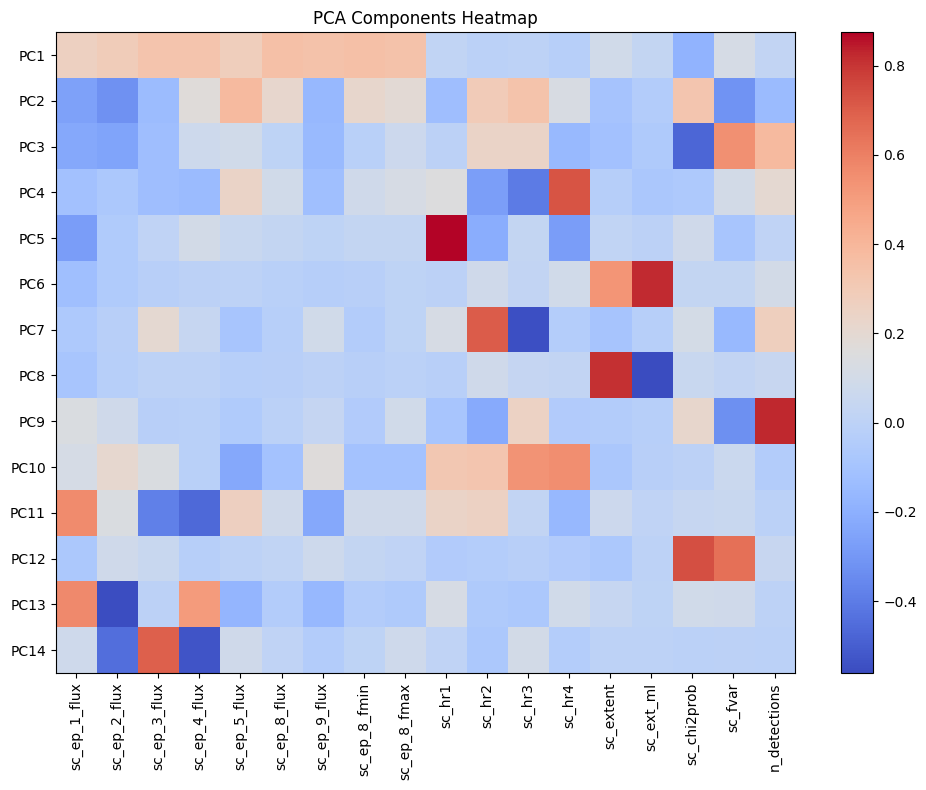

In [ ]:
# visualization using a heatmap
plt.figure(figsize=(12, 8))
plt.imshow(pca_components, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.xticks(ticks=np.arange(len(pca_components.columns)), labels=pca_components.columns, rotation=90)
plt.yticks(ticks=np.arange(len(pca_components.index)), labels=pca_components.index)
plt.title('PCA Components Heatmap')
plt.tight_layout()
plt.show()

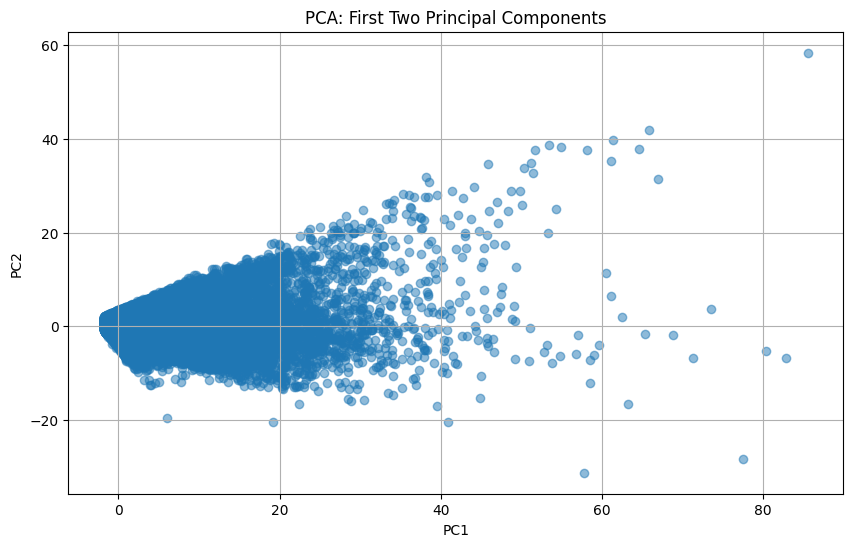

In [ ]:
# scatter plot of the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.5)
plt.title('PCA: First Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()

In [13]:
# create a dataframe with for each row the reconstruction errors for each PCA component
# subtract the original data from the PCA inverse transformed data
df_reconstruction = pd.DataFrame(pca.inverse_transform(df_pca.values), columns=df.columns, index=df.index)
df_reconstruction_errors = df_scaled - df_reconstruction

In [17]:
df_reconstruction_errors_scaled = StandardScaler().fit_transform(df_reconstruction_errors)
df_reconstruction_errors_scaled = pd.DataFrame(df_reconstruction_errors_scaled, columns=df.columns, index=df.index)
df_reconstruction_errors_scaled.head()

,sc_ep_1_flux,sc_ep_2_flux,sc_ep_3_flux,sc_ep_4_flux,sc_ep_5_flux,sc_ep_8_flux,sc_ep_9_flux,sc_ep_8_fmin,sc_ep_8_fmax,sc_hr1,sc_hr2,sc_hr3,sc_hr4,sc_extent,sc_ext_ml,sc_chi2prob,sc_fvar,n_detections
iauname,,,,,,,,,,,,,,,,,,
4XMM J000000.2-552106,0.118331,0.045722,0.039842,0.121361,0.149701,-0.195698,-0.009806,-0.185966,0.061331,-0.157410,-0.053418,-0.049179,-0.006756,-0.009696,-0.016383,0.126895,0.136872,-0.077698
4XMM J000000.2+623123,-0.000954,0.168993,0.163664,0.215653,0.085261,-0.123704,-0.143220,-0.098188,0.031353,-0.211313,0.094514,0.019106,0.123709,0.014629,-0.140491,0.164361,0.161817,-0.034935
4XMM J000000.3-250629,-0.046963,-0.057663,-0.077275,-0.084442,-0.094658,0.050149,0.044208,-0.055112,0.069676,0.034002,-0.024797,-0.085867,-0.021283,-0.083212,0.026765,0.008362,0.014262,-0.072445
4XMM J000000.3-601742,0.310501,-0.020777,-0.002572,0.120056,0.339661,-0.300266,0.084673,-0.229204,0.005640,-0.135128,-0.188403,-0.017765,-0.126674,0.069805,0.089671,0.076137,0.094117,-0.035457
4XMM J000000.5-552138,0.109999,0.101054,0.115614,0.173772,0.182999,-0.128741,-0.065191,-0.081277,-0.029143,-0.142652,0.005243,0.055856,0.031819,0.077396,-0.051988,0.086690,0.087975,0.019138


In [18]:
# apply PCA to the reconstruction errors
pca_reconstruction_errors = PCA(n_components=0.99)
pca_reconstruction_errors.fit(df_reconstruction_errors_scaled.values)
pca_reconstruction_errors.explained_variance_ratio_

array([0.53981575, 0.35041289, 0.07811727, 0.03165409])

In [20]:
# interpret the PCA components of the reconstruction errors
pca_reconstruction_errors.components_
# create a DataFrame for the PCA components of the reconstruction errors
pca_reconstruction_errors_components = pd.DataFrame(pca_reconstruction_errors.components_,
                                                   columns=df_reconstruction_errors_scaled.columns,
                                                   index=[f'PC{i+1}' for i in range(pca_reconstruction_errors.n_components_)])
pca_reconstruction_errors_components

,sc_ep_1_flux,sc_ep_2_flux,sc_ep_3_flux,sc_ep_4_flux,sc_ep_5_flux,sc_ep_8_flux,sc_ep_9_flux,sc_ep_8_fmin,sc_ep_8_fmax,sc_hr1,sc_hr2,sc_hr3,sc_hr4,sc_extent,sc_ext_ml,sc_chi2prob,sc_fvar,n_detections
PC1,0.274807,-0.260529,-0.202832,-0.225322,0.198438,0.087039,0.269669,0.125053,-0.191867,0.305847,-0.266780,0.104725,-0.296130,0.168408,0.298791,-0.304172,-0.294879,0.179120
PC2,0.019773,0.230273,0.305046,0.251243,0.190853,0.264325,-0.214843,0.275594,-0.318897,-0.005810,0.198722,0.375854,0.143734,0.330992,-0.142678,-0.088566,-0.113507,0.328966
PC3,0.432572,0.062519,0.093446,0.275460,0.523367,-0.141734,0.037728,-0.449397,-0.023020,-0.248056,-0.205219,0.020784,-0.111778,0.154131,0.053706,0.185121,0.217658,-0.039903
PC4,-0.033268,-0.030299,-0.042844,-0.056920,-0.065991,0.896031,0.021006,-0.386263,0.014479,0.087306,-0.016198,-0.056197,-0.008528,-0.002597,0.011499,0.076633,0.112594,-0.077578


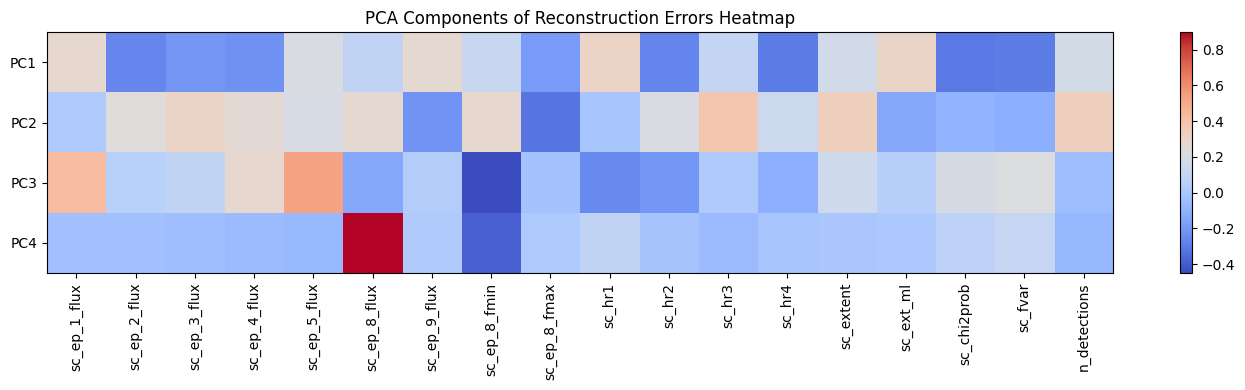

In [31]:
# visualize it using a heatmap
plt.figure(figsize=(14, 4))
plt.imshow(pca_reconstruction_errors_components, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.xticks(ticks=np.arange(len(pca_reconstruction_errors_components.columns)), labels=pca_reconstruction_errors_components.columns, rotation=90)
plt.yticks(ticks=np.arange(len(pca_reconstruction_errors_components.index)), labels=pca_reconstruction_errors_components.index)
plt.title('PCA Components of Reconstruction Errors Heatmap')
plt.tight_layout()
plt.show()

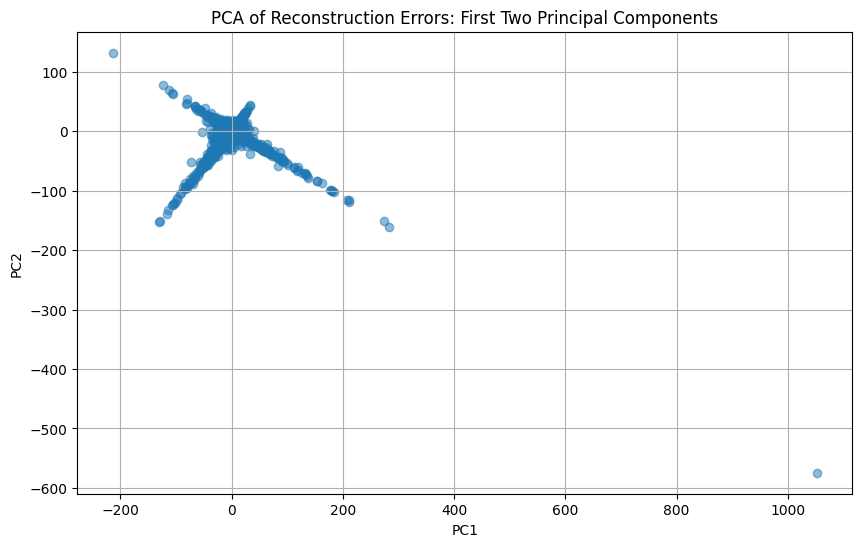

In [19]:
# scatter plot of the first two principal components of the reconstruction errors
plt.figure(figsize=(10, 6))
plt.scatter(pca_reconstruction_errors.transform(df_reconstruction_errors_scaled.values)[:, 0],
            pca_reconstruction_errors.transform(df_reconstruction_errors_scaled.values)[:, 1],
            alpha=0.5)
plt.title('PCA of Reconstruction Errors: First Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()

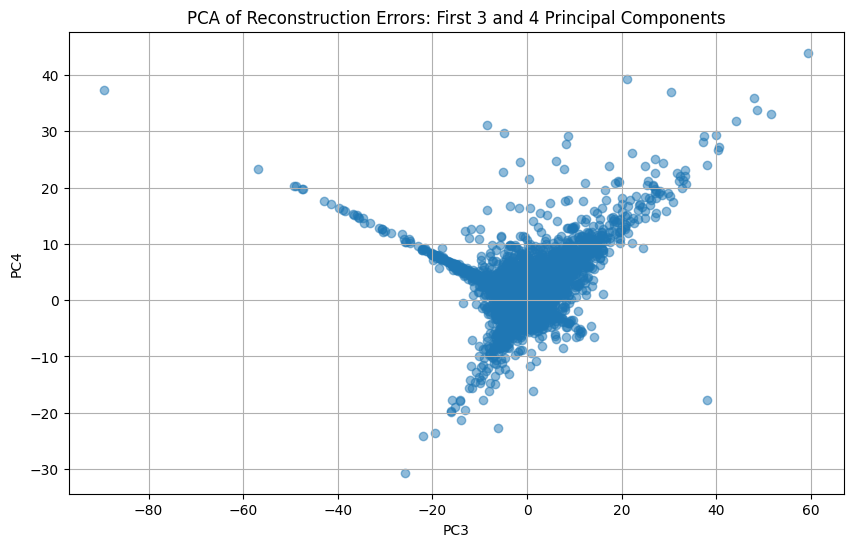

In [25]:
# scatter plot of the first two principal components of the reconstruction errors
plt.figure(figsize=(10, 6))
plt.scatter(pca_reconstruction_errors.transform(df_reconstruction_errors_scaled.values)[:, 2],
            pca_reconstruction_errors.transform(df_reconstruction_errors_scaled.values)[:, 3],
            alpha=0.5)
plt.title('PCA of Reconstruction Errors: First 3 and 4 Principal Components')
plt.xlabel('PC3')
plt.ylabel('PC4')
plt.grid()
plt.show()